# Project: Investigating Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In This Report , I am going to analyse the movie dataset, where I would like to find the Revenue of the movie according to movies popularity , How many movies are above and below and above the average in respective of revenue.



In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling





### General Properties

In [50]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_tmbd = pd.read_csv("tmdb-movies.csv")
df_tmbd.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [43]:
df_tmbd.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [44]:
df_tmbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       



### Data Cleaning (Replace this with more specific notes!)

In [51]:
#Deleting few unecessary columns because their is no need of those columns in our data set
#Or I don't need these data for my analysis, and there are many null data.
# homepage , tagline, imdb_id,overview and keywords
df_tmbd.drop(columns = ['homepage','tagline','keywords','imdb_id','overview','production_companies'], axis = 1, inplace = True)

In [52]:
#check whether those columns are deleted 
df_tmbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
 13  budget_adj      10866 non-null  float64
 14  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


In [53]:
#now drop the null values
df_tmbd.dropna()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


<a id='eda'></a>
## Exploratory Data Analysis






### Research Question #1 (How many movies are above  and below on average revenue ?)

In [103]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
mean = df_tmbd['revenue'].mean()
above = df_tmbd.query('revenue > {}'.format(mean))
below = df_tmbd.query('revenue < {}'.format(mean))


In [70]:
df_tmbd['revenue'].mean()

39823319.79339223

In [104]:
len(above)

2170

In [105]:
len(below)

8696

#### Observation 1
> From this analysis we find that 2170 movies earn revenue more then the total average revenue, and 8696 movies are below average revenue.

### Research Question #2  (Do Movies with higher Popularity receive better ratings?)

In [113]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
mean_p = df_tmbd['popularity'].mean()
above_p = df_tmbd.query('popularity > {}'.format(mean_p))
below_p = df_tmbd.query('popularity < {}'.format(mean_p))

mean_vote_below = below_p['vote_average'].mean()
mean_vote_above = above_p['vote_average'].mean()

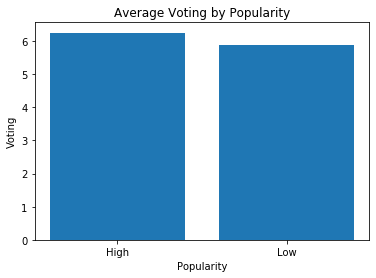

In [114]:
locations = [1, 2]
heights = [mean_vote_above, mean_vote_below]
labels = ['High', 'Low']
plt.bar(locations, heights , tick_label=labels)
plt.title('Average Voting by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Voting');

#### Observation 2
> From this analysis I find that Higher popularity movie also get better ratings.

### Research Question #3  (Do Movies with higher Popularity receive better Revenue?)

In [115]:
mean_rev = df_tmbd['revenue'].mean()
above_rev = df_tmbd.query('revenue > {}'.format(mean_pi))
below_rev = df_tmbd.query('revenue < {}'.format(mean_pi))

mean_popularity_below = below_rev['popularity'].mean()
mean_popularity_above = above_rev['popularity'].mean()

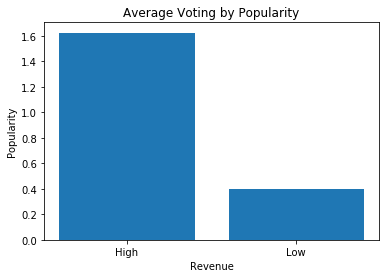

In [116]:
locations = [1, 2]
heights = [mean_popularity_abovei, mean_popularity_belowi]
labels = ['High', 'Low']
plt.bar(locations, heights , tick_label=labels)
plt.title('Average Popularity by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Average Popularity');

#### Observation 3
> Movies with high Revenues are likely to be more popular.

### Research Question #4  (Hit or Flop , How Many movie get Revenue more then Budget?)


In [130]:
hit = df_tmbd.query('revenue > budget')
flop = df_tmbd.query('revenue < budget')
insufficient_data = df_tmbd.query('revenue == budget')

In [131]:
len(hit)

3773

In [132]:
len(flop)

2388

#### Observation 4
> Due to Insuffieciency of data, I get 3773 hit movies and 2388 flop movies on the basis of Revenue > Budget .

<a id='conclusions'></a>
## Conclusions

> I can conclude from this report that, Only 2170 movies out of 10732 movies have more revenue as compared to the average revenue. Popularity and User Ratings are dependent on each other, means more the popular movies more the movie get Ratings.
and I can also conclude that movie with high populartiy has a chance of bigger revenue. and if i Compare the Revenue and Budget of the movie , I see that very less movies got hit.


